## Comparing Associativity between different caches

The associativity of a cache refers to the mapping of the blocks.

- Direct mapping is the simplest mapping where each cache block can only be a a specific block in the cache (address mod number of blocks).
- Fully associative is the mapping where any block can be placed anywhere in the cache. It is the most complex but should perform the best
- N-Way Set Associatice should is a compromize between the two where an address is confined to a set in the cache but can be placed anywhere within the set.

In [10]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from glob import glob

results = {}
tempList = []
associativities = ['Direct', 'FA', 'SA']
for associativity in associativities:
    for f_name in glob('../cache_config/results/Direct_to_FA_comparaison/' + associativity + '/*.json'):
        with open(f_name) as f:
            tempList.append(json.load(f))
    results[associativity] = copy.deepcopy(tempList)
    tempList = []

In [11]:
results

{'Direct': [{'amat': 3.066666666666667,
   'number_layers': 3,
   'caches': [{'size': 64,
     'hit_rate': 0.9163636363636364,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_BACK',
     'block_size': 8,
     'access_time': 2},
    {'size': 128,
     'hit_rate': 0.8947368421052632,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_THROUGH',
     'block_size': 16,
     'access_time': 5},
    {'size': 256,
     'hit_rate': 0.7333333333333333,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_BACK',
     'block_size': 32,
     'access_time': 20}],
   'amat_write': 5.0,
   'MMAT': 50,
   'benchmark_name': 'vet20parinum.s',
   'amat_read': 3.042944785276074},
  {'amat': 10.909090909090908,
   'number_layers': 1,
   'caches': [{'size': 128,
     'hit_rate': 0.9818181818181818,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_BACK',
     'block_size': 8,
     'access_time': 10}],
   'amat_write': 10.0,
   'MMAT': 50,
   'benchmark_name': 

In [12]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for associativity in associativities:
        amat_results[var].append(average(results[associativity], var))
    amat_results[var] = tuple(amat_results[var])

amat values:
	amat_Direct = 8.983495827843655 cycles
	amat_FA = 9.80276240667545 cycles
	amat_SA = 12.06721343873518 cycles

amat_read values:
	amat_read_Direct = 8.271883725056261 cycles
	amat_read_FA = 9.071136696827931 cycles
	amat_read_SA = 11.326843992492366 cycles

amat_write values:
	amat_write_Direct = 30.363636363636363 cycles
	amat_write_FA = 31.181818181818183 cycles
	amat_write_SA = 33.3939393939394 cycles



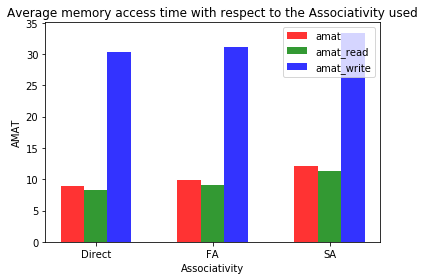

In [13]:
# data to plot
n_groups = len(associativities)
colors = ['r', 'g', 'b']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

count = 0
for var in interest_var:
    print(var + " values:")
    for associativity in associativities:
        print('\t' + var + '_' + associativity + " = " + str(amat_results[var][associativities.index(associativity)]) + ' cycles')
    plt.bar(index + count * bar_width, amat_results[var], bar_width,
        alpha=opacity,
        color=colors[count],
        label=var)
    count += 1
    print()

plt.xlabel('Associativity')
plt.ylabel('AMAT')
plt.title('Average memory access time with respect to the Associativity used')
plt.xticks(index + bar_width, associativities)
plt.legend()
 
plt.tight_layout()
plt.show()